<div style="text-align: center;">
<h2>INFSCI 2595 Machine Learning - Spring 2019 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Due: Feb 17, 2019</h3>
<h3>Total points: 100 </h3>
</div>

In [4]:
# Type in your information in the double quotes
firstName = "Shanim"
lastName = "Manzoor"
pittID = "shm150"

In [26]:
#Libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

<h3>  Problem #1. K-nearest neighbors  [13 points] </h3> 

In this problem, do not use built-in  functions for classification (i.e. do not use sklearn.neighbors). You will be required to do the calculations and make the predictions based on your understanding of how the technique works. You can use pen and paper to do the calculations (and upload image of your solutions) or write the code of detailed calculations and prediction.

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = -1, X2 = 1 X3 = 2 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0|3|0|Green|
|2 |2|0|0|Green|
|3|0|1|3|Green|
|4|0|1|2|Red|
|5|-1|0|1|Red|
|6|1|1|1|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point. Your output should be a (6*1) column vector where each row shows the distance between the observations and the test point [5 pts]. 


<b>Problem #1-2.</b> What is our prediction with K = 1? [2pts]

<b>Problem #1-3.</b> What is our prediction with K = 3? K = 5? [3pts]

<b>Problem #1-4.</b>  For KNN classification, discuss the impact of choosing the parameter K on the model performance. Highlight the different trade-offs [3pts].

# if the value of k is too low , say 1,  we see a lot of bias and overfitting to the training set
# if the value of k is too high , we can see  see there will be a generalization and the model will be a terrible predictor as it is a classic case of underfitting
# the value of k is a design decision where we have to consider bias-variance tradeoff

![alt text](files/1.jpg )

![alt text](files/2.jpg )

![alt text](files/3.jpg )

<h3>  Problem #2. Linear regression calculations of coefficients and $R^2$ [17 points] </h3>  
-  You should not use built-in functions for linear regression in this question's parts (2-1) and (2-2). Do the calculations manually or explicitly by code. <br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data. Coefficients are obtained using the formulas [7pts]: 
\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

|Smoke index(x)|Lung cancer mortality index(y)|
|:--:|:-------------------------------:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

<b>Problem #2-2.</b> Given the test data below, compute the TSS, RSS and the R-squared metric of the fitted model [6pts]

|Xi|Yi|
|:--:|:-------------------------------:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

<b>Problem #2-3.</b> Check your calculations by finding the coefficients and the $R^2$ score using scikit-learn library (from sklearn.linear_model import LinearRegression) [4pts]

In [147]:
from sklearn.linear_model import LinearRegression
#df1=pd.DataFrame({
 #   "x1":[127,121,94,126,102,111,95,89,101],
  #  "y1":[115,128,128,156,101,128,115,105,87]
#})

#df2=pd.DataFrame({
 #   "x2":[90,106,105,115,113],
  #  "y2":[103,131,85,99,144]})
#X1=df1.x1
#Y1=df1.y1
#X2=df2.x2
#Y2=df2.y2
#df1.head()

# d1={'x1':[127,121,94,126,102,111,95,89,101],
#     'y1':[115,128,128,156,101,128,115,105,87]
#    }
               
# d2={'x2':[90,106,105,115,113],
#     'y2':[103,131,85,99,144]
#     }

d1 = np.array([[127,121,94,126,102,111,95,89,101],[115,128,128,156,101,128,115,105,87]])
d2 = np.array([[90,106,105,115,113],[103,131,85,99,144]])
df1 = pd.DataFrame(d1.T,columns=['x1','y1'])
df2 = pd.DataFrame(d2.T,columns=['x2','y2']) 

X1=df1['x1']
Y1=df1['y1']
X2=df2['x2']
Y2=df2['y2']
# X_train, X_test, Y_train, Y_test= train_test_split(df1.x1.,df1.y1, random_state=0)
lm1=LinearRegression().fit(df1.drop(columns=['y1']),df1.y1)
# score
print(lm1.score(df2.drop(columns=['y2']),Y2))




0.040627525222455496


<h3>  Problem #3. Linear Regression Optimization with Stochastic Gradient Descent  [20 points] </h3> 


In this question, you will create a synthetic dataset, then use gradient descent to find the coefficients' estimates. We will see how the RSS changes with iterations of the gradient descent. 


<b>Problem #3-1.</b> Create a label $y$, which is related to a feature $X$, such that $y=10 + 5 X + \epsilon$. $\epsilon$ is a Gaussian noise (normal distribution) with mean 0 and unit variance. X is generated from a uniform distribution as given in the code below. The number of observations to be generated is 100 [4pts].

(array([10.,  6., 13., 10., 15., 11.,  8.,  7.,  9., 11.]),
 array([ 14.53515967,  23.94492157,  33.35468347,  42.76444538,
         52.17420728,  61.58396918,  70.99373108,  80.40349298,
         89.81325488,  99.22301678, 108.63277868]),
 <a list of 10 Patch objects>)

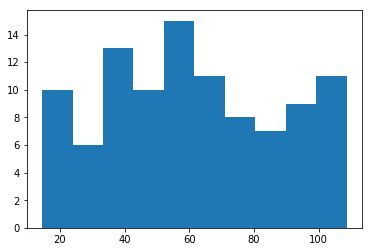

In [102]:

NumberObservations=100
minVal=1
maxVal=20
X = np.random.uniform(minVal,maxVal,(NumberObservations,1))
#Add you code below to define error and Y based on the information above
y=10+5*X+np.random.normal(0,1)
y.shape
plt.hist(y) 




## here we have used normal function for noise with unit variance and zero mean. y has been set as the sum of scaled X ,10 and noise

<b>Problem #3-2.</b> Now assume we don't know the actual relationship between X and y. Use the generated noisy data and find the coefficients of a linear regression model obtained by gradient descent. Do not use any built-in functions for gradient descent. Write the code based on your understanding of the algorithm. The cost function is the RSS, set the number of iterations to 10000 and the learning rate to 0.00001.

- Print the estimated coefficients of the model obtained using gradient descent [7 pts]
- Record the RSS in each iteration of the gradient descent and plot the last 6000 values of the RSS. Comment on figure. [3 pts]
- Comment on how close the obtained coefficients are from the actual ones [3pts]

In [177]:
def  cal_cost(t,X,y):

    
    m = len(y)
    
    predictions = X.dot(t)
    cost = np.sum(np.square(predictions-y))
    return cost
#here we are calculating cost for each iteration for the gradient_descent fucnction defined below


In [178]:
def gradient_descent(X,y,theta,learning_rate,it1):

    m = len(y)
    cost_history = np.zeros(it1)
    theta_history = np.zeros((it1,2))
    for i in range(it1):
        
        prediction = np.dot(X,theta)
        
        theta = theta - learning_rate*( X.T.dot((prediction - y)))
        theta_history[i,:] =theta.T
        cost_history[i]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history


Bias(b0):
7.802000454646847
b1
5.09158704341284


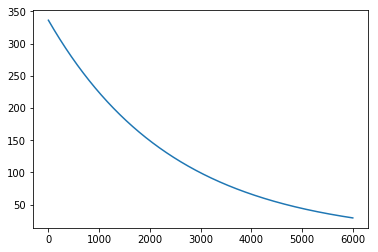

In [179]:
learning =0.00001
iterations = 10000

theta = np.random.randn(2,1)

X1 = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X1,y,theta,learning,iterations)


print('')
print('Bias(b0):')
print(theta[0][0])
print('b1')
print(theta[1][0])


plt.plot(cost_history[4000:-1])

### Cost is decreasing as we reach the end of our iteration (RSS)
### the values are close to the correct parameters here

In [ ]:
<b>Problem #3-1.</b> Repeat (3-1) and (3-2) but increase the standard deviation of the error to 100. Comment on output coefficient estimates. (3pts)

(array([10.,  6., 13., 10., 15., 11.,  8.,  7.,  9., 11.]),
 array([104.77549677, 114.18525867, 123.59502057, 133.00478247,
        142.41454437, 151.82430628, 161.23406818, 170.64383008,
        180.05359198, 189.46335388, 198.87311578]),
 <a list of 10 Patch objects>)

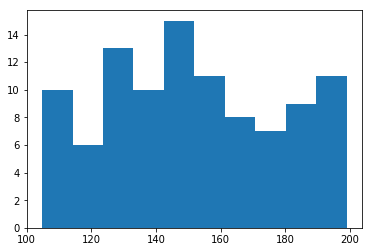

In [180]:
y2=10+5*X+np.random.normal(0,100)
y2.shape
plt.hist(y2)
#here the standard deviation is 100 instead


Bias(b0):
86.3758776154172
b1
5.982809319576179


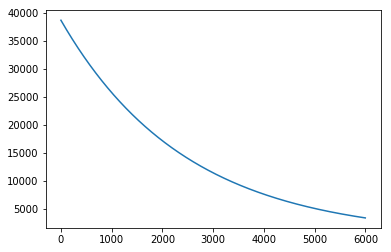

In [182]:
learning =0.00001
iterations = 10000

theta = np.random.randn(2,1)

X1 = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X1,y2,theta,learning,iterations)




print('')
print('Bias(b0):')
print(theta[0][0])
print('b1')
print(theta[1][0])




plt.plot(cost_history[4000:10000])

## Here we see that second situation is very random
## In the second scenario, the variance/Std. deviation of the error is comparitively much higher
## cost function in second case, the combination of std. deviation and the low learning rate causes it to not reach ideal values even after 10,000 iterations for the bias term atleast.


In [101]:
# learning=0.00001
# n=10000
# m1=0
# b1=0
# #mcurrent=m1,bcurrent=b1,ycurr=y1
# for i in range(10000):
#     y1 = (m1 * X) + b1
#     cost = sum([test**2 for test in (y-y1)]) / n
#     m2 = -(2/n) * sum(X*(y - y1))
#     b2 = -(2/n) * sum(y - y1)
#     m1 = m1 - (learning* m2)
#     b1 = b1 - (learning * b2)

    
# print(m1[0])
# print(b1[0])
# print (sum(cost))

<h3>  Problem #4. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 
- The target value is MEDV => Median value of owner-occupied homes in $1000's
  
Use a code below to download the  dataset: 

In [29]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Print and read the description of the dataset then answer the following questions. 



In [30]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<b>Problem #4-1</b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" method)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> [4pts]

-  Which feature has the lowest range (minimum and maximum value)?

-  Which feature has the higest mean?  

-  Which feature has a highest variance? 

In [150]:
df1 = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [151]:
range1= []
for i in range(len(df1.columns)):
    range1.append(max(df1.iloc[:,i])-min(df1.iloc[:,i]))
minrange=min(range1)
print(range1)
print(minrange)
#5th column or NOX has least range
#Highest Mean is TAX =408.237154
# Highest Variance is also TAX


[88.96988, 100.0, 27.279999999999998, 1.0, 0.486, 5.218999999999999, 97.1, 10.9969, 23.0, 524.0, 9.4, 396.58, 36.24]
0.486


# 5th column or NOX has least range
# Highest Mean is TAX =408.237154
# Highest Variance is also TAX as standard deviation  value is highest!

<b>Problem #4-2</b> Feature Scaling

<b> Answer the following questions:</b> [4pts]

- From the information above, Do you recommend **feature scaling** ? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

Answer
* Yes It is definitely recommended , as ranges of the features are extremely diverse as seen in range1 variable
* MinMax scaler- scales features in  new range from 0 to 1
* Standard Scaler- scales features with mean=0 and variance=1


<b>Problem #4-3</b> Calculate and report **correlations** between variables [4pts]

Follow the following steps to answer questions.

- Add target to the dataFrame.

- Find the correlation matrix that shows the correlation between each pair of variables in the dataframe. <br>

- Plot a correlation matrix as heatmap. You can check: https://seaborn.pydata.org/generated/seaborn.heatmap.html



<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the target class? Explain.

- What is the correlation between the feature RM and the LSTAT?
- What does this value of correlation indicate?

In [152]:
df1['target']=dataset.target
print(df1.corr())


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 


- What is a difference between positive and negative numbers on the correlation table? Explain.
# A positive correlation means if 1 variable changes in a direction, the other will change in the same direction ( both will increase or decrease corresponding to each other)
# A negative correlation implies an opposing effect where if 1 variable increases, the other decreases
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the target class? Explain.
# LStat is the most correlated with a negative correlationof -0.737. Yes high value of +ve or -ve correlation are good indicators.We can verify using p-values.

- What is the correlation between the feature RM and the LSTAT?
# the correlation between the feature RM and the LSTAT is -0.613808
- What does this value of correlation indicate?
# They have high negative correlation between each other. This might imply collinearity. We should check p-values.

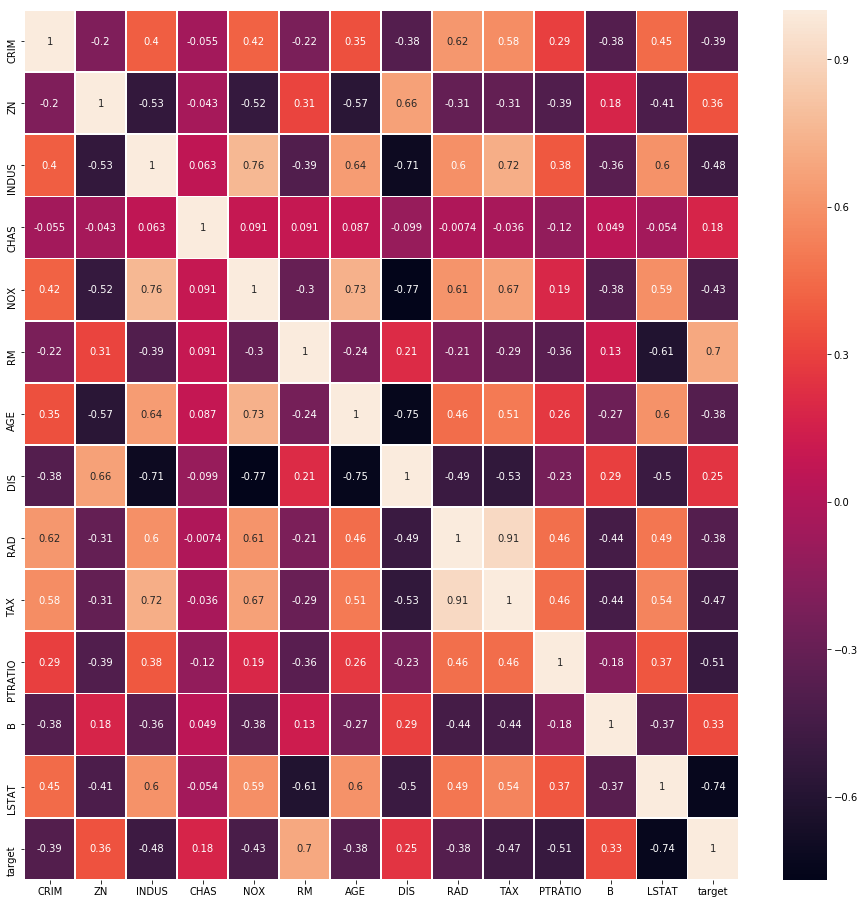

In [153]:
plt.figure(figsize = (16,16))
sns.heatmap(df1.corr(),annot=True,linewidths=0.8)


<b>Problem #4-4</b> Scatter plot. [4pts] <br>  
- Plot RM versus target variable 
- Plot TAX versus target variable 
- Plot LSTAT versus target variable <br> 
- Comment on each of the above plots. Is the relationship linear or non linear?


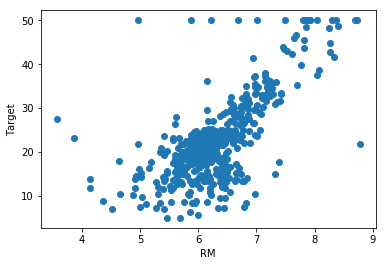

In [154]:
plt.xlabel('RM')
plt.ylabel('Target')
plt.scatter(df1.RM,df1.target)


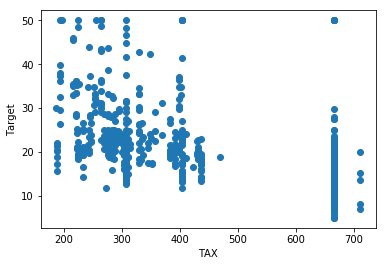

In [155]:
plt.xlabel('TAX')
plt.ylabel('Target')
plt.scatter(df1.TAX,df1.target)

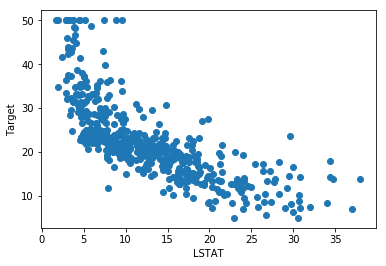

In [156]:
plt.xlabel('LSTAT')
plt.ylabel('Target')
plt.scatter(df1.LSTAT,df1.target)

Comment on each of the above plots. Is the relationship linear or non linear?
# RM versus target variable (nearly Linear )
# TAX versus target variable (nonlinear)
# LSTAT versus target variable( nearly quadratic)


<b>Problem #4-5.</b> 

- Feel free to use scikit-learn (sklearn library) or write your own code to answer the following questions..
- Use train_test_split() with "random_state=0

Answer the following questions [10 points]:

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric on train and test sets. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

In [157]:
 #Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric on train and test sets.
x1=df1[['RM','LSTAT']]
y1=df1.target
X_train, X_test, Y_train, Y_test= train_test_split(x1, y1, random_state=0)

lm1=LinearRegression().fit(X_train,Y_train)
# score
print(" R2 score with only RM and LSTAT for train and test set")
print(lm1.score(X_train,Y_train))
print(lm1.score(X_test,Y_test))



 R2 score with only RM and LSTAT for train and test set
0.65978465698869
0.5692445415835348


In [158]:
#Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?

df1['RMLSTAT']=df1.RM*df1.LSTAT
x1=df1[['RM','LSTAT','RMLSTAT']]
y1=df1.target

X_train, X_test, Y_train, Y_test= train_test_split(x1, y1, random_state=0)

lm1=LinearRegression().fit(X_train,Y_train)
# score
print(" R2 score with only  RM,LSTAT and RMLSTAT for train and test set")
print(lm1.score(X_train,Y_train))
print(lm1.score(X_test,Y_test))




 R2 score with only  RM,LSTAT and RMLSTAT for train and test set
0.7646463324677745
0.6615207706770683


In [160]:
#Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.

df1['LSTAT2']=df1.LSTAT*df1.LSTAT
x1=df1[['LSTAT','LSTAT2']]

y1=df1.target

X_train, X_test, Y_train, Y_test= train_test_split(x1, y1, random_state=0)

lm1=LinearRegression().fit(X_train,Y_train)
# score
print(" R2 score with only  LSTAT and LSTAT2 for train and test set")
print(lm1.score(X_train,Y_train))
print(lm1.score(X_test,Y_test))


 R2 score with only  LSTAT and LSTAT2 for train and test set
0.668789207898638
0.5518753354137799


In [161]:
# Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric.

df1['LSTAT4']=df1.LSTAT2*df1.LSTAT2
y1=df1.target
x1=df1[['LSTAT','LSTAT2','LSTAT4']]

X_train, X_test, Y_train, Y_test= train_test_split(x1, y1, random_state=0)

lm1=LinearRegression().fit(X_train,Y_train)
# score
print(" R2 score with only  LSTAT,LSTAT2 and LSTAT4 for train and test set")
print(lm1.score(X_train,Y_train))
print(lm1.score(X_test,Y_test))


 R2 score with only  LSTAT,LSTAT2 and LSTAT4 for train and test set
0.6801267294823293
0.5696493127277786


# Case1: RM and LSTAT- For Test Set R2 score is  0.5692445415835348
# Case 2:RM,LSTAT and RMLSTAT for Test set R2 score: 0.6615207706770683
# case 3: LSTAT and LSTAT2 , the test set R2 score: 0.5518
# Case4 : LSTAT,LSTAT2,LSTAT4 the test set R2 score:0.569

# this implies that the addition of the interaction term between RM and LSTAT improves the model the most as it has the highest test R2 score. Making the model polynomial with respect to LSTAT has no actual impact and might actually decrease accuracy and add unnecessary complexity


<b>Problem #4-6.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report p-values of all feature [4 pts]<br> 

- What does p-value represent?
- What are the features that have strong association with the target? what are the ones that seem to have week association? <br> 


In [128]:
df2=pd.DataFrame(dataset.data,columns= dataset.feature_names)
df2['target']=dataset.target
df2.head()
olsmodel=smf.ols('target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',df2)
fit1=olsmodel.fit()
print(fit1.summary())
print("PVALUES:")
print(fit1.pvalues)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          6.95e-135
Time:                        15:45:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

 What does p-value represent?
# A small p-value usually indicates that the null hypothesis doesn't have sufficient validity to remain.here null hypothesis is that the features are not important or indicative of dependence
 
What are the features that have strong association with the target? what are the ones that seem to have week association
# Most seem important except AGE AND INDUS 
# Age has Pvalue=0.954 and Indus=0.734 . Due to this these features should not be considered significant

<h3>  Problem #5. Regularization [20 points] </h3>  
Regularization will be covered in lecture on Feb 11. 


- In this problem, we will use the same dataset as in previous question -- the Boston data set.
- Scale the features with StandardScaler

In [164]:
from sklearn import preprocessing
df5 = pd.DataFrame(dataset.data, columns= dataset.feature_names)




In [165]:
df5.head()
df5['target']=dataset.target

x5=df5.drop('target',axis=1)
y5=df5.target
X_train, X_test, Y_train, Y_test= train_test_split(x5, y5, random_state=0)
scaler=preprocessing.StandardScaler().fit(X_train)
X_trainscaled=scaler.transform(X_train)
X_testscaled=scaler.transform(X_test)



<b>Problem #5-1.</b> Use Ridge regression model with tuning parameter set to 1 (alpha =1). Find the test $R^2$ score and number of non zero coefficients.

<b>Problem #5-2.</b>  Use Lasso regression instead of Ridge regression, also set the tuning parameter to 1. Find the test $R^2$ score and number of non zero coefficients.

<b>Problem #5-3.</b>  Change the tuning parameter of the Lasso model to a very low value (alpha =0.001). What is the $R^2$ score.

<b>Problem #4-4.</b> Comment on your result. 


In [168]:
 #5-1.</b> Use Ridge regression model with tuning parameter set to 1 (alpha =1). Find the test $R^2$ score and number of non zero coefficients.
from sklearn.linear_model import Ridge
x5=df5.drop('target',axis=1)
y5=df5.target
rml1=Ridge( ).fit(X_trainscaled, Y_train) 

print(rml1.score(X_testscaled,Y_test))

print(np.sum(rml1.coef_!=0))  
    

0.6344884687786745
13


In [24]:
#5-2.</b>  Use Lasso regression instead of Ridge regression, also set the tuning parameter to 1. Find the test $R^2$ score and number of non zero coefficients.
from sklearn.linear_model import Lasso
lassoModel=Lasso( ).fit(X_train, Y_train)
LassoModel1=Lasso(alpha=1).fit(X_trainscaled,Y_train)
print(LassoModel1.score(X_testscaled,Y_test))
np.sum(LassoModel1.coef_!=0)



0.5656049912104312


5

In [25]:
 #5-3.</b>  Change the tuning parameter of the Lasso model to a very low value (alpha =0.001). What is the $R^2$ score.
lassoModel=Lasso( ).fit(X_trainscaled, Y_train)
LassoModel2=Lasso(alpha=0.001). fit(X_trainscaled, Y_train)
print(LassoModel2.score(X_testscaled,Y_test))
np.sum(LassoModel2.coef_!=0)


0.6352523424770306


13

# Ridge regression will not see any decrease in the number of coefficients as its an L2 norm function and its shrinkage penalty only makes the coefficients very small
# As the alpha  value increases more features tend towards zero
# in the case of alpha=1 , we see equivalent performance of lasso and ridge regression

==========================================================================+============================================== <br> =========================================================================================================================

### Submission
Once you completed the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb